# CHANGEME: Location - Data type

CHANGEME: A few sentences about the data and links to the original data providers.

**Source:** CHANGEME

**License:** CHANGEME (include a link to where the license is stated if possible)

## Notes

CHANGEME: Any relevant notes about this dataset, such as data format, original coordinate systems, or anything else that's relevant.

In [1]:
import os
import numpy as np
import verde as vd
import pyshtools as pysh
import boule as bl
import pygmt

## Download the data

Use [SHTOOLS](https://github.com/SHTOOLS/SHTOOLS) to download the original data file to our computer. This is a spherical harmonic model which we can turn into a grid.

In [2]:
model = pysh.datasets.Moon.GRGM900C()

In [3]:
model.info()

kind = 'real'
normalization = '4pi'
csphase = 1
lmax = 900
GM (m3 / s2) = 4902799967088.641
r0 (m) = 1738000.0
Omega (rad / s) = 2.6617072234847315e-06
error_kind = 'unspecified'
header = ['0.1738000000000000E+04', '0.4902799967088640E+04', '1.4178101463045039E-05', '900', '900', '1', '0.0000000000000000E+00', '0.0000000000000000E+00']
header2 = None
name = 'GRGM900C'
epoch = None


## Expand into a grid

In [27]:
height = 11_000  # meters
data = model.expand(lmax=539, a=bl.MOON.radius + height, f=0, normal_gravity=False).to_xarray().total
data

<xarray.DataArray 'total' (lat: 1081, lon: 2161)>
array([[1.60364429, 1.60364429, 1.60364429, ..., 1.60364429, 1.60364429,
        1.60364429],
       [1.60357553, 1.60357538, 1.60357524, ..., 1.60357581, 1.60357567,
        1.60357553],
       [1.60348779, 1.60348748, 1.60348717, ..., 1.60348841, 1.6034881 ,
        1.60348779],
       ...,
       [1.60436167, 1.60436196, 1.60436225, ..., 1.6043611 , 1.60436138,
        1.60436167],
       [1.60448674, 1.60448679, 1.60448685, ..., 1.60448663, 1.60448669,
        1.60448674],
       [1.60458625, 1.60458625, 1.60458625, ..., 1.60458625, 1.60458625,
        1.60458625]])
Coordinates:
  * lat      (lat) float64 90.0 89.83 89.67 89.5 ... -89.5 -89.67 -89.83 -90.0
  * lon      (lon) float64 0.0 0.1667 0.3333 0.5 ... 359.5 359.7 359.8 360.0
Attributes:
    actual_range:  [1.5998024804341497, 1.6100709462500475]
    comment:       pyshtools grid
    nlat:          1081
    nlon:          2161
    lmax:          539
    kind:          real
    grid:          DH
    extend:        True
    sampling:      2
    title:         total gravity disturbance
    long_name:     $|g|$
    units:         $m s^{-2}$

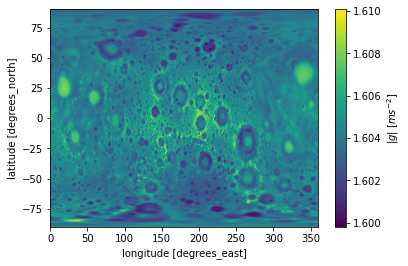

In [28]:
data.plot()

## Format the grid

In [29]:
data = data.sortby("lat")
data

<xarray.DataArray 'total' (lat: 1081, lon: 2161)>
array([[1.60458625, 1.60458625, 1.60458625, ..., 1.60458625, 1.60458625,
        1.60458625],
       [1.60448674, 1.60448679, 1.60448685, ..., 1.60448663, 1.60448669,
        1.60448674],
       [1.60436167, 1.60436196, 1.60436225, ..., 1.6043611 , 1.60436138,
        1.60436167],
       ...,
       [1.60348779, 1.60348748, 1.60348717, ..., 1.60348841, 1.6034881 ,
        1.60348779],
       [1.60357553, 1.60357538, 1.60357524, ..., 1.60357581, 1.60357567,
        1.60357553],
       [1.60364429, 1.60364429, 1.60364429, ..., 1.60364429, 1.60364429,
        1.60364429]])
Coordinates:
  * lat      (lat) float64 -90.0 -89.83 -89.67 -89.5 ... 89.5 89.67 89.83 90.0
  * lon      (lon) float64 0.0 0.1667 0.3333 0.5 ... 359.5 359.7 359.8 360.0
Attributes:
    actual_range:  [1.5998024804341497, 1.6100709462500475]
    comment:       pyshtools grid
    nlat:          1081
    nlon:          2161
    lmax:          539
    kind:          real
    grid:          DH
    extend:        True
    sampling:      2
    title:         total gravity disturbance
    long_name:     $|g|$
    units:         $m s^{-2}$

In [30]:
data = data.assign_coords(height=(("lat", "lon"), np.full(data.shape, height, dtype="float32")))
data

<xarray.DataArray 'total' (lat: 1081, lon: 2161)>
array([[1.60458625, 1.60458625, 1.60458625, ..., 1.60458625, 1.60458625,
        1.60458625],
       [1.60448674, 1.60448679, 1.60448685, ..., 1.60448663, 1.60448669,
        1.60448674],
       [1.60436167, 1.60436196, 1.60436225, ..., 1.6043611 , 1.60436138,
        1.60436167],
       ...,
       [1.60348779, 1.60348748, 1.60348717, ..., 1.60348841, 1.6034881 ,
        1.60348779],
       [1.60357553, 1.60357538, 1.60357524, ..., 1.60357581, 1.60357567,
        1.60357553],
       [1.60364429, 1.60364429, 1.60364429, ..., 1.60364429, 1.60364429,
        1.60364429]])
Coordinates:
  * lat      (lat) float64 -90.0 -89.83 -89.67 -89.5 ... 89.5 89.67 89.83 90.0
  * lon      (lon) float64 0.0 0.1667 0.3333 0.5 ... 359.5 359.7 359.8 360.0
    height   (lat, lon) float32 1.1e+04 1.1e+04 1.1e+04 ... 1.1e+04 1.1e+04
Attributes:
    actual_range:  [1.5998024804341497, 1.6100709462500475]
    comment:       pyshtools grid
    nlat:          1081
    nlon:          2161
    lmax:          539
    kind:          real
    grid:          DH
    extend:        True
    sampling:      2
    title:         total gravity disturbance
    long_name:     $|g|$
    units:         $m s^{-2}$

In [31]:
data = data.rename(dict(lon="longitude", lat="latitude"))
data.name = "gravity"
data

<xarray.DataArray 'gravity' (latitude: 1081, longitude: 2161)>
array([[1.60458625, 1.60458625, 1.60458625, ..., 1.60458625, 1.60458625,
        1.60458625],
       [1.60448674, 1.60448679, 1.60448685, ..., 1.60448663, 1.60448669,
        1.60448674],
       [1.60436167, 1.60436196, 1.60436225, ..., 1.6043611 , 1.60436138,
        1.60436167],
       ...,
       [1.60348779, 1.60348748, 1.60348717, ..., 1.60348841, 1.6034881 ,
        1.60348779],
       [1.60357553, 1.60357538, 1.60357524, ..., 1.60357581, 1.60357567,
        1.60357553],
       [1.60364429, 1.60364429, 1.60364429, ..., 1.60364429, 1.60364429,
        1.60364429]])
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.83 -89.67 -89.5 ... 89.67 89.83 90.0
  * longitude  (longitude) float64 0.0 0.1667 0.3333 0.5 ... 359.7 359.8 360.0
    height     (latitude, longitude) float32 1.1e+04 1.1e+04 ... 1.1e+04 1.1e+04
Attributes:
    actual_range:  [1.5998024804341497, 1.6100709462500475]
    comment:       pyshtools grid
    nlat:          1081
    nlon:          2161
    lmax:          539
    kind:          real
    grid:          DH
    extend:        True
    sampling:      2
    title:         total gravity disturbance
    long_name:     $|g|$
    units:         $m s^{-2}$

In [33]:
def minmax_round(grid, decimals):
    """
    Return the minimunameand maximum values in the grid 
    rounded to *decimal* places.
    """
    vmin = np.round(grid.values.min(), decimals=decimals)
    vmax = np.round(grid.values.max(), decimals=decimals)
    return (vmin, vmax)

In [35]:
data.attrs = {
    "Conventions": "CF-1.8",
    "title": "Gravity acceleration (GRGM900C) at a constant geometric height",
    "crs": str(bl.MOON),
    "source": "Generated from the GRGM900C model using pyshtools",
    "license": "Creative Commons Attribution 4.0 International Licence",
    "references": "https://doi.org/10.1002/2014GL060027",
    "long_name": "gravity acceleration",
    "description": "magnitude of the gravity acceleration vector (gravitational + centrifugal)",
    "units": "mGal",
    "actual_range": minmax_round(data, decimals=1),
}
data.longitude.attrs = {
    "long_name": "longitude",
    "standard_name": "longitude",
    "units": "degrees_east",
    "actual_range": (data.longitude.values.min(), data.longitude.values.max()),
}
data.latitude.attrs = {
    "long_name": "latitude",
    "standard_name": "latitude",
    "units": "degrees_north",
    "actual_range": (data.latitude.values.min(), data.latitude.values.max()),
}
data.height.attrs = {
    "long_name": "geometric height",
    "standard_name": "height_above_reference_ellipsoid",
    "description": f"height of gravity computation points above the lunar sphere with radius {bl.MOON.radius} m",
    "units": "m",
    "actual_range": (data.height.values.min(), data.height.values.max()),
}
data

<xarray.DataArray 'gravity' (latitude: 1081, longitude: 2161)>
array([[1.60458625, 1.60458625, 1.60458625, ..., 1.60458625, 1.60458625,
        1.60458625],
       [1.60448674, 1.60448679, 1.60448685, ..., 1.60448663, 1.60448669,
        1.60448674],
       [1.60436167, 1.60436196, 1.60436225, ..., 1.6043611 , 1.60436138,
        1.60436167],
       ...,
       [1.60348779, 1.60348748, 1.60348717, ..., 1.60348841, 1.6034881 ,
        1.60348779],
       [1.60357553, 1.60357538, 1.60357524, ..., 1.60357581, 1.60357567,
        1.60357553],
       [1.60364429, 1.60364429, 1.60364429, ..., 1.60364429, 1.60364429,
        1.60364429]])
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.83 -89.67 -89.5 ... 89.67 89.83 90.0
  * longitude  (longitude) float64 0.0 0.1667 0.3333 0.5 ... 359.7 359.8 360.0
    height     (latitude, longitude) float32 1.1e+04 1.1e+04 ... 1.1e+04 1.1e+04
Attributes:
    Conventions:   CF-1.8
    title:         Gravity acceleration (GRGM900C) at a constant geometric he...
    crs:           Sphere(name='MOON', radius=1737151, geocentric_grav_const=...
    source:        Generated from the GRGM900C model using pyshtools
    license:       Creative Commons Attribution 4.0 International Licence
    references:    https://doi.org/10.1002/2014GL060027
    long_name:     gravity acceleration
    description:   magnitude of the gravity acceleration vector (gravitationa...
    units:         mGal
    actual_range:  (1.6, 1.6)

## Export

Make a separate DataFrame to export to a compressed CSV. The conversion is needed to specify the number of significant digits to preserve in the output. Setting this along with the LZMA compression can help reduce the file size considerably. Not all fields in the original data need to be exported.

In [5]:
export = pd.DataFrame({
    "year_decimal": data.year_decimal.map(lambda x: "{:.4f}".format(x)),
    "monthly_average": data.monthly_average.map(lambda x: "{:.2f}".format(x)),   
})
export

,year_decimal,monthly_average
0,1958.2027,315.70
1,1958.2877,317.45
2,1958.3699,317.51
3,1958.4548,317.24
4,1958.5370,315.86
...,...,...
761,2021.6250,414.47
762,2021.7083,413.30
763,2021.7917,413.93
764,2021.8750,415.01


Save the data to a file and calculate the size and MD5/SHA256 hashes.

In [6]:
output = "mauna-loa-co2.csv.xz"
export.to_csv(output, index=False)
print(f"file: {output}")
print(f"size: {os.path.getsize(output) / 1e6} Mb")
for alg in ["md5", "sha256"]:
    print(f"{alg}:{pooch.file_hash(output, alg=alg)}")

file: mauna-loa-co2.csv.xz
size: 0.002132 Mb
md5:7095047376c4983cca627e52aa5b28de
sha256:10fa809c3d2e27764543298b3677a727ac833b15c5ba1830e481e5df9a341d78


## Read back the data and plot it

Verify that the output didn't corrupt anything.

In [7]:
data_reloaded = pd.read_csv(output)
data_reloaded

,year_decimal,monthly_average
0,1958.2027,315.70
1,1958.2877,317.45
2,1958.3699,317.51
3,1958.4548,317.24
4,1958.5370,315.86
...,...,...
761,2021.6250,414.47
762,2021.7083,413.30
763,2021.7917,413.93
764,2021.8750,415.01


Make the figure again but don't save it to a file this time.

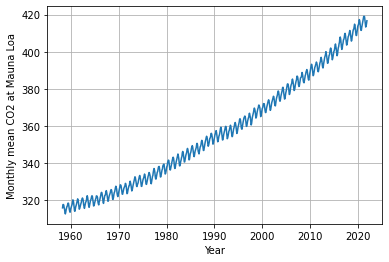

In [8]:
plt.figure()
plt.plot(data_reloaded.year_decimal, data_reloaded.monthly_average)
plt.grid()
plt.xlabel("Year")
plt.ylabel("Monthly mean CO2 at Mauna Loa")
plt.show()